In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio

from astropy import units as u
from astropy.coordinates import SkyCoord

sys.path.append(os.path.expanduser("~")+'/git/Python/user_modules/')
from match_coord import search_around, scatter_plot, match_coord

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [6]:
gaia_path = '/global/cscratch1/sd/rongpu/dr9dev/gaia_in_dr9sv/brightest_g_less_than_19_stars-dr9sv_south.fits'
gaia_columns = ['RA', 'DEC', 'PHOT_G_MEAN_MAG', 'PHOT_BP_MEAN_MAG', 'PHOT_RP_MEAN_MAG']
gaia = fitsio.read(gaia_path, columns=gaia_columns)
gaia = Table(gaia)

In [11]:
print(np.max(gaia['PHOT_G_MEAN_MAG']))
print(np.min(gaia['PHOT_G_MEAN_MAG']))
print()
print(np.max(gaia['PHOT_BP_MEAN_MAG']))
print(np.min(gaia['PHOT_BP_MEAN_MAG']))
print()
print(np.max(gaia['PHOT_RP_MEAN_MAG']))
print(np.min(gaia['PHOT_RP_MEAN_MAG']))

20.0
2.39369

24.1141
0.0

20.4936
0.0


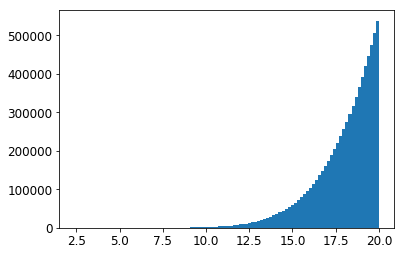

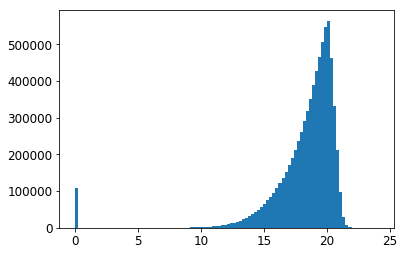

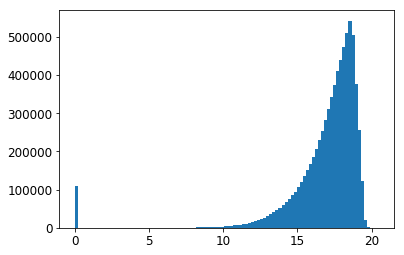

In [12]:
plt.hist(gaia['PHOT_G_MEAN_MAG'], 100)
plt.show()

plt.hist(gaia['PHOT_BP_MEAN_MAG'], 100)
plt.show()

plt.hist(gaia['PHOT_RP_MEAN_MAG'], 100)
plt.show()

fraction of GAIA stars without valid BP or RP: 0.015


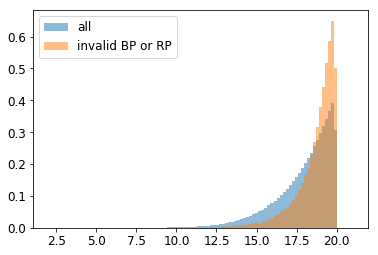

In [30]:
mask = (gaia['PHOT_BP_MEAN_MAG']==0) | (gaia['PHOT_RP_MEAN_MAG']==0)
plt.hist(gaia['PHOT_G_MEAN_MAG'], 100, alpha=0.5, normed=True, range=(2, 21), label='all')
plt.hist(gaia['PHOT_G_MEAN_MAG'][mask], 100, alpha=0.5, normed=True, range=(2, 21), label='invalid BP or RP')
plt.legend()
plt.show()

In [39]:
mask = (gaia['PHOT_BP_MEAN_MAG']==0) | (gaia['PHOT_RP_MEAN_MAG']==0)
print('Fraction of G<20 GAIA stars without valid BP or RP: {:.2f}%'.format(np.sum(mask)/len(mask)*100))
mask = (gaia['PHOT_G_MEAN_MAG']<16)
mask1 = mask & ((gaia['PHOT_BP_MEAN_MAG']==0) | (gaia['PHOT_RP_MEAN_MAG']==0))
print('Fraction of G<16 GAIA stars without valid BP or RP: {:.2f}%'.format(np.sum(mask1)/np.sum(mask)*100))
mask = (gaia['PHOT_G_MEAN_MAG']<13)
mask1 = mask & ((gaia['PHOT_BP_MEAN_MAG']==0) | (gaia['PHOT_RP_MEAN_MAG']==0))
print('Fraction of G<13 GAIA stars without valid BP or RP: {:.2f}%'.format(np.sum(mask1)/np.sum(mask)*100))

Fraction of G<20 GAIA stars without valid BP or RP: 1.47%
Fraction of G<16 GAIA stars without valid BP or RP: 0.48%
Fraction of G<13 GAIA stars without valid BP or RP: 0.25%
